In [ ]:
#Task 3-Part 1 - CAN NETWORK FIT RANDOM LABELS ??

Training epoch 1

Test set, Epoch 1, Average loss: 0.0230, Accuracy: 13%

Training epoch 2

Test set, Epoch 2, Average loss: 0.0230, Accuracy: 10%

Training epoch 3

Test set, Epoch 3, Average loss: 0.0230, Accuracy: 8%

Training epoch 4

Test set, Epoch 4, Average loss: 0.0231, Accuracy: 5%

Training epoch 5

Test set, Epoch 5, Average loss: 0.0231, Accuracy: 7%

Training epoch 6

Test set, Epoch 6, Average loss: 0.0231, Accuracy: 5%

Training epoch 7

Test set, Epoch 7, Average loss: 0.0231, Accuracy: 4%

Training epoch 8

Test set, Epoch 8, Average loss: 0.0231, Accuracy: 4%

Training epoch 9

Test set, Epoch 9, Average loss: 0.0232, Accuracy: 6%

Training epoch 10

Test set, Epoch 10, Average loss: 0.0231, Accuracy: 5%

Training epoch 11

Test set, Epoch 11, Average loss: 0.0232, Accuracy: 7%

Training epoch 12

Test set, Epoch 12, Average loss: 0.0231, Accuracy: 6%

Training epoch 13

Test set, Epoch 13, Average loss: 0.0232, Accuracy: 9%

Training epoch 14

Test set, Epoch 14, Av

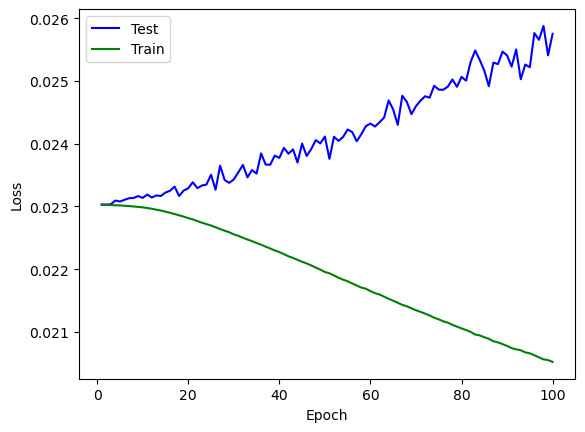

Number of parameters: 51580


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

# Define transformation
transform_pipeline = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Function to load and assign random labels
def load_data_with_random_labels(train_size, test_size):
    train_data = datasets.MNIST('data', train=True, download=False, transform=transform_pipeline)
    train_data.targets = torch.tensor(np.random.randint(0, 10, len(train_data)))
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=train_size, shuffle=True)

    test_data = datasets.MNIST('data', train=False, transform=transform_pipeline)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=test_size, shuffle=True)

    return train_loader, test_loader

# Model definition
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, 5)
        self.conv2 = nn.Conv2d(5, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 100)
        self.fc2 = nn.Linear(100, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Training function
def train_network(model, optimizer, train_data):
    model.train()
    total_correct = 0
    total_loss = 0

    for batch_idx, (inputs, labels) in enumerate(train_data):
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predictions = np.argmax(outputs.data, axis=1)
        total_correct += np.equal(predictions, labels.data).sum()

    average_loss = total_loss / len(train_data.dataset)
    accuracy = 100.0 * total_correct / len(train_data.dataset)
    return average_loss, accuracy

# Testing function
def evaluate_network(model, epoch, test_data):
    model.eval()
    total_test_loss = 0
    total_correct = 0

    for inputs, labels in test_data:
        inputs, labels = Variable(inputs), Variable(labels)
        outputs = model(inputs)
        loss = loss_criterion(outputs, labels)
        total_test_loss += loss.item()
        predictions = np.argmax(outputs.data, axis=1)
        total_correct += np.equal(predictions, labels.data).sum()

    average_test_loss = total_test_loss / len(test_loader.dataset)
    accuracy = 100.0 * total_correct / len(test_data.dataset)
    print(f'\nTest set, Epoch {epoch}, Average loss: {average_test_loss:.4f}, Accuracy: {accuracy:.0f}%\n')
    return average_test_loss

# Initialize data, model, optimizer
train_size = 100
test_size = 100
train_loader, test_loader = load_data_with_random_labels(train_size, test_size)

cnn_model = CNNModel()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.0001)
loss_criterion = torch.nn.CrossEntropyLoss()

# Variables to store losses and epoch data
train_losses = []
test_losses = []
epochs_list = []

# Train and evaluate model for a set number of epochs
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    print(f'Training epoch {epoch}')
    train_loss, train_accuracy = train_network(cnn_model, optimizer, train_loader)
    train_losses.append(train_loss)
    
    test_loss = evaluate_network(cnn_model, epoch, test_loader)
    test_losses.append(test_loss)
    epochs_list.append(epoch)

# Plotting the results
plt.plot(epochs_list, test_losses, color="blue")
plt.plot(epochs_list, train_losses, color="green")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test', 'Train'])
plt.show()

# Model parameters count
model_parameters_count = sum(param.numel() for param in cnn_model.parameters())
print(f'Number of parameters: {model_parameters_count}')


In [ ]:
#Task 3-Part 2- number of parameters vs generalization#

Training Model 1
Model trained with parameters: 15958, Train loss: 0.2842174768447876, Test loss: 0.278199702501297
Training Model 2
Model trained with parameters: 31818, Train loss: 0.23082301020622253, Test loss: 0.23240621387958527
Training Model 3
Model trained with parameters: 47678, Train loss: 0.16600346565246582, Test loss: 0.1724444031715393
Training Model 4
Model trained with parameters: 63538, Train loss: 0.14280515909194946, Test loss: 0.1564238965511322
Training Model 5
Model trained with parameters: 79398, Train loss: 0.13650794327259064, Test loss: 0.14846305549144745
Training Model 6
Model trained with parameters: 95258, Train loss: 0.13845990598201752, Test loss: 0.1521482616662979
Training Model 7
Model trained with parameters: 111118, Train loss: 0.1486685872077942, Test loss: 0.16676512360572815
Training Model 8
Model trained with parameters: 126978, Train loss: 0.13168533146381378, Test loss: 0.13974280655384064
Training Model 9
Model trained with parameters: 14283

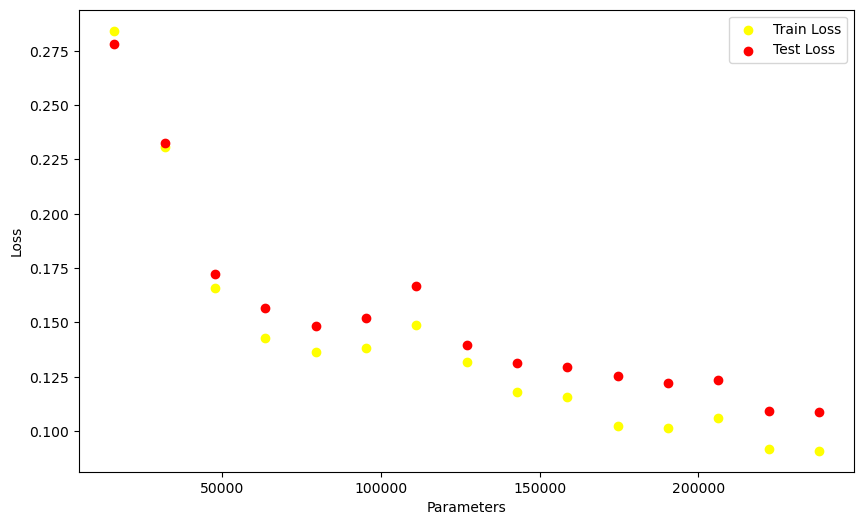

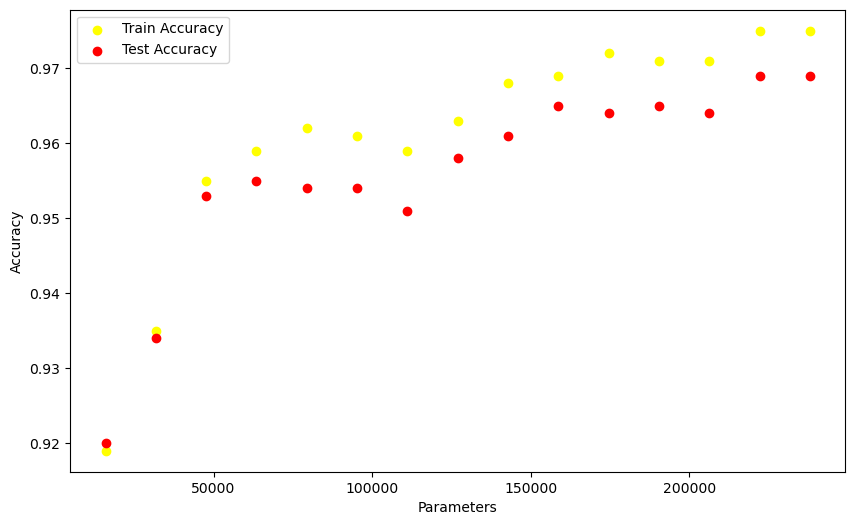

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

def load_data(train_size, test_size):
    trainset = datasets.MNIST('data', train=True, download=False,
                              transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081,))
                              ]))
    train_data = torch.utils.data.DataLoader(trainset, batch_size=train_size, shuffle=True)

    testset = datasets.MNIST('data', train=False, download=False,
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))
                             ]))
    test_data = torch.utils.data.DataLoader(testset, batch_size=test_size, shuffle=True)

    return (train_data, test_data)

# Model Definitions (Model 1 to Model 15)
class Model(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size1)
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        self.linear3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# Initialize optimizer
def initiliase_optimizer(model):
    return optim.Adam(model.parameters(), lr=0.0001)

# Training function
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data.view(-1, 784))
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

# Calculate performance
def calculate_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct / total, 3)

# Training function for multiple models
def train_models(model, optimizer, train_data, test_data):
    total_train_loss = 0
    for epoch in range(1, 9):
        train(model, optimizer, train_data)
    train_loss, train_acc = calculate_op_diff(model, train_data)
    test_loss, test_acc = calculate_op_diff(model, test_data)

    train_loss_arr.append(train_loss.item())
    test_loss_arr.append(test_loss.item())
    train_accuracy_arr.append(train_acc)
    test_accuracy_arr.append(test_acc)
    param_arr.append(sum(p.numel() for p in model.parameters()))

    print(f"Model trained with parameters: {sum(p.numel() for p in model.parameters())}, Train loss: {train_loss}, Test loss: {test_loss}")

# Prepare data
train_batch_size = 50
test_batch_size = 100
train_data, test_data = load_data(train_batch_size, test_batch_size)

# Initialize arrays for tracking performance
param_arr = []
train_loss_arr = []
test_loss_arr = []
train_accuracy_arr = []
test_accuracy_arr = []

# Train 15 models with different hidden layer sizes
for i in range(1, 16):
    hidden_size1 = 20 * i
    hidden_size2 = 8
    model = Model(784, hidden_size1, hidden_size2, 10)
    optimizer = initiliase_optimizer(model)
    print(f"Training Model {i}")
    train_models(model, optimizer, train_data, test_data)

# Plot the results
plt.figure(figsize=(10, 6))
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.scatter(param_arr, train_loss_arr, color="yellow", label='Train Loss')
plt.scatter(param_arr, test_loss_arr, color="red", label='Test Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.scatter(param_arr, train_accuracy_arr, color="yellow", label='Train Accuracy')
plt.scatter(param_arr, test_accuracy_arr, color="red", label='Test Accuracy')
plt.legend()
plt.show()


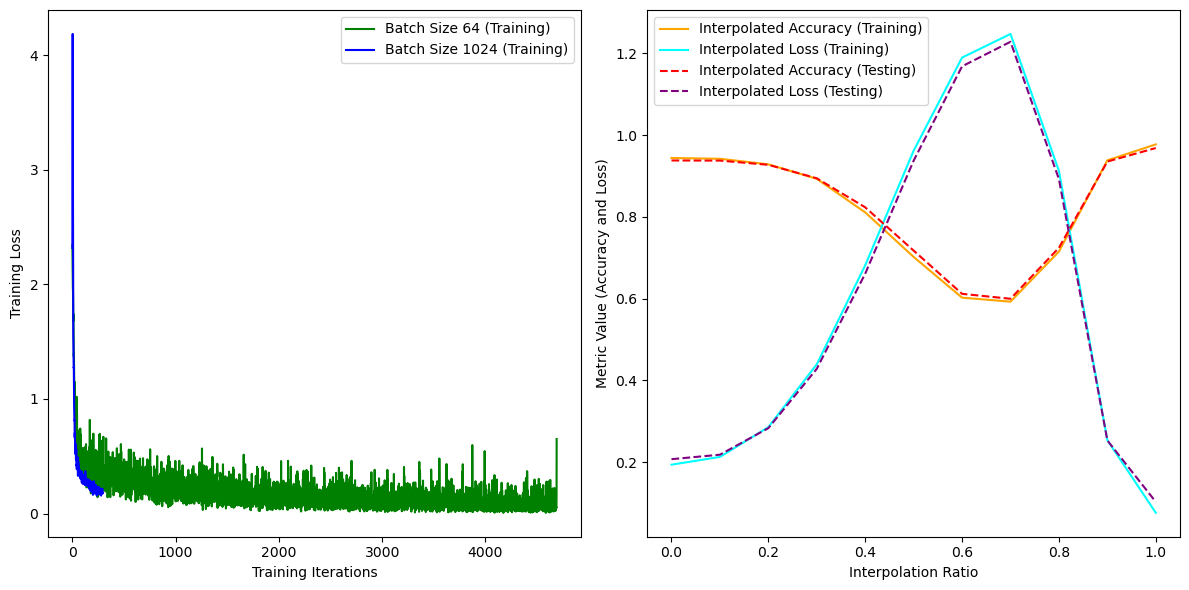

In [2]:
#Task 3-Part 3- Flatness vs Genralization PART 1

#CROSS ENTROPY LOSS AND ACCURACY VS ALPHA
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

torch.manual_seed(1)

# Define the neural network architecture (same as before)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train a model
def train_model(model, loader, loss_func, optimizer, epochs=5):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        for inputs, labels in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
    return train_losses

# Function to evaluate a model on a dataset
def evaluate_model(model, data_loader, loss_func):
    model.eval()
    correct_predictions = 0
    total_samples = 0
    total_loss = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            total_loss += loss_func(outputs, labels).item()
    accuracy = correct_predictions / total_samples
    return accuracy, total_loss / len(data_loader)

# Linear interpolation function
def linear_interpolation(model1, model2, alpha):
    interpolated_model = SimpleNN()
    new_state_dict = {}
    for key in model1.state_dict():
        new_state_dict[key] = alpha * model1.state_dict()[key] + (1 - alpha) * model2.state_dict()[key]
    interpolated_model.load_state_dict(new_state_dict)
    return interpolated_model

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Set up data loaders
batch_size_small = 64
batch_size_large = 1024
train_loader_small = DataLoader(mnist_train, batch_size=batch_size_small, shuffle=True)
train_loader_large = DataLoader(mnist_train, batch_size=batch_size_large, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=100, shuffle=False)

# Define models
model_small_batch = SimpleNN()
model_large_batch = SimpleNN()

# Define loss function and optimizers
loss_func = nn.CrossEntropyLoss()
optimizer_small = optim.Adam(model_small_batch.parameters(), lr=1e-3)
optimizer_large = optim.Adam(model_large_batch.parameters(), lr=1e-2)

# Train the models
train_loss_small = train_model(model_small_batch, train_loader_small, loss_func, optimizer_small)
train_loss_large = train_model(model_large_batch, train_loader_large, loss_func, optimizer_large)

# Evaluate models
accuracy_small, _ = evaluate_model(model_small_batch, test_loader, loss_func)
accuracy_large, _ = evaluate_model(model_large_batch, test_loader, loss_func)

# Linear interpolation and evaluation for different interpolation ratios
alphas = torch.linspace(0, 1, 11)
interp_accuracies_train = []
interp_losses_train = []
interp_accuracies_test = []
interp_losses_test = []

for alpha in alphas:
    interp_model = linear_interpolation(model_small_batch, model_large_batch, alpha)
    
    # Evaluate on both training and test sets
    accuracy_train, loss_train = evaluate_model(interp_model, train_loader_small, loss_func)
    accuracy_test, loss_test = evaluate_model(interp_model, test_loader, loss_func)
    
    interp_accuracies_train.append(accuracy_train)
    interp_losses_train.append(loss_train)
    interp_accuracies_test.append(accuracy_test)
    interp_losses_test.append(loss_test)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_small, color='green', label='Batch Size 64 (Training)')
plt.plot(train_loss_large, color='blue', label='Batch Size 1024 (Training)')
plt.xlabel('Training Iterations')
plt.ylabel('Training Loss')
plt.legend()

# Plot interpolated accuracy and loss (training and testing)
plt.subplot(1, 2, 2)
plt.plot(alphas.numpy(), interp_accuracies_train, color='orange', label='Interpolated Accuracy (Training)')
plt.plot(alphas.numpy(), interp_losses_train, color='cyan', label='Interpolated Loss (Training)')
plt.plot(alphas.numpy(), interp_accuracies_test, color='red', linestyle='--', label='Interpolated Accuracy (Testing)')
plt.plot(alphas.numpy(), interp_losses_test, color='purple', linestyle='--', label='Interpolated Loss (Testing)')
plt.xlabel('Interpolation Ratio')
plt.ylabel('Metric Value (Accuracy and Loss)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Task 3-PART 3 Flatness VS Genrelazation PART 2

#Sensitivity and Crossnentropy Loss VS Batch size

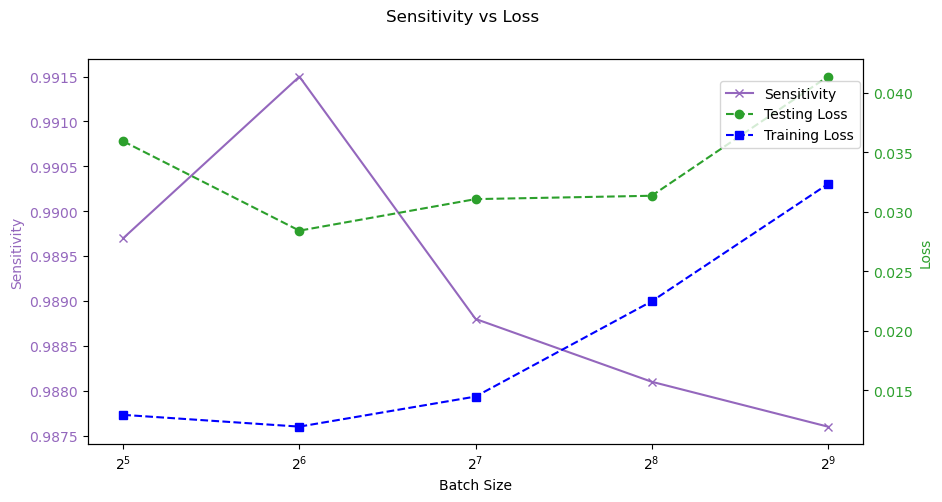

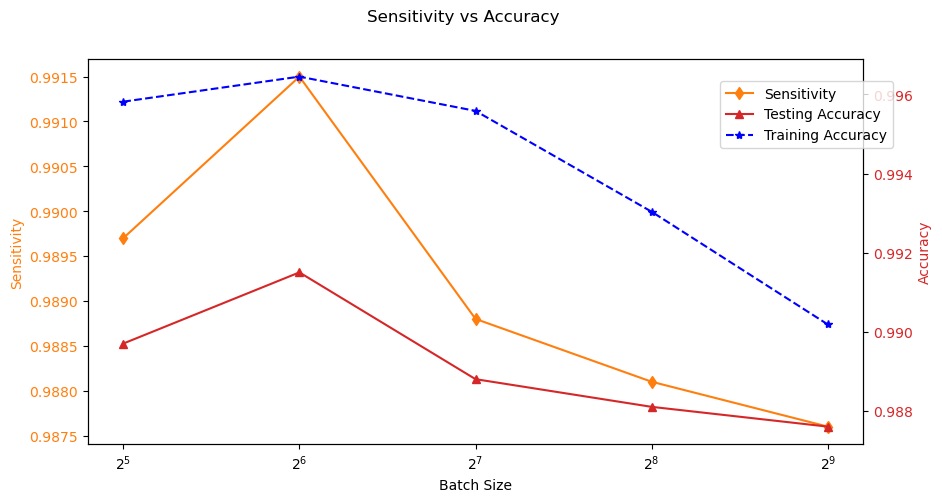

In [8]:
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

# Function to evaluate the model and record metrics
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to device
            outputs = model(inputs)
            total_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    sensitivity = np.sum(np.diag(cm)) / np.sum(cm)

    accuracy = correct / len(data_loader.dataset)
    avg_loss = total_loss / len(data_loader)

    return avg_loss, accuracy, sensitivity

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define transformations and download MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define batch size for each model
batch_size_per_model = [32, 64, 128, 256, 512]

# Lists to store results
training_losses = []
testing_losses = []
training_accuracies = []
testing_accuracies = []
sensitivities = []

# Train and evaluate models for different batch sizes
for batch_size in batch_size_per_model:
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Move model to device (use GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_model(model, train_loader, criterion, optimizer, device)

    # Evaluate on training set
    train_loss, train_accuracy, _ = evaluate_model(model, train_loader, criterion, device)
    training_losses.append(train_loss)
    training_accuracies.append(train_accuracy)

    # Evaluate on testing set
    test_loss, test_accuracy, sensitivity = evaluate_model(model, test_loader, criterion, device)
    testing_losses.append(test_loss)
    testing_accuracies.append(test_accuracy)
    sensitivities.append(sensitivity)

# Plot Sensitivity vs Loss
fig, ax1 = plt.subplots(figsize=(10, 5))
color_sensitivity = 'tab:purple'
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Sensitivity', color=color_sensitivity)
ax1.plot(batch_size_per_model, sensitivities, color=color_sensitivity, marker='x', linestyle='-', label='Sensitivity')
ax1.tick_params(axis='y', labelcolor=color_sensitivity)

ax2 = ax1.twinx()
color_loss = 'tab:green'
ax2.set_ylabel('Loss', color=color_loss)
ax2.plot(batch_size_per_model, testing_losses, color=color_loss, linestyle='--', marker='o', label='Testing Loss')
ax2.plot(batch_size_per_model, training_losses, color='blue', linestyle='--', marker='s', label='Training Loss')
ax2.tick_params(axis='y', labelcolor=color_loss)
plt.xscale('log', base=2)
fig.suptitle('Sensitivity vs Loss')
fig.legend(loc='upper left', bbox_to_anchor=(0.75, 0.85))
plt.show()

# Plot Sensitivity vs Accuracy
fig, ax1 = plt.subplots(figsize=(10, 5))
color_sensitivity = 'tab:orange'
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Sensitivity', color=color_sensitivity)
ax1.plot(batch_size_per_model, sensitivities, color=color_sensitivity, marker='d', linestyle='-', label='Sensitivity')
ax1.tick_params(axis='y', labelcolor=color_sensitivity)

ax2 = ax1.twinx()
color_accuracy = 'tab:red'
ax2.set_ylabel('Accuracy', color=color_accuracy)
ax2.plot(batch_size_per_model, testing_accuracies, color=color_accuracy, linestyle='-', marker='^', label='Testing Accuracy')
ax2.plot(batch_size_per_model, training_accuracies, color='blue', linestyle='--', marker='*', label='Training Accuracy')
ax2.tick_params(axis='y', labelcolor=color_accuracy)
plt.xscale('log', base=2)
fig.suptitle('Sensitivity vs Accuracy')
fig.legend(loc='upper left', bbox_to_anchor=(0.75, 0.85))
plt.show()
